# Zuber, a ride-sharing startup

### Descripción: Analyzing customer preferences, analyzing competitors, and testing hypotheses of the impact of weather on sales.

## Indice de Contenidos

1 Introducción

2 Inicialización y carga de datos.

3 Preparación de los datos.

4 Análisis de los datos.

5 Pruebas de hipótesis.

6 Conclusión General.

### Introducción

En este proyecto vamos a trabajar con 3 conjuntos de datos con información sobre empresas de taxis y sus viajes en Chicago. Estos conjuntos de datos nos entregarán información sobre las compañías de taxis, sobre los barrios de Chicago donde finalizaron los viajes y sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 

En el desarrollo del proyecto vamos a importar los archivos, estudiar los datos que contienen y asegurarnos de que los tipos de datos sean correctos. Para luego realizar la etapa de análisis de datos y luego continuar con la prueba de hipótesis.

### Inicialización y carga de datos. 

Importar Librerías:

In [56]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos
sns.set_theme() # ocupamos esa librería para tener meejores gráficos

Leer el Conjunto de Datos con la información de las Compañías:

In [57]:
# Cargamos el DataFrame:
companies = pd.read_csv('/datasets/project_sql_result_01.csv') #cargamos el DataFrame de la Compañías.
locations = pd.read_csv('/datasets/project_sql_result_04.csv') #cargamos el DataFrame de los barrios de Chicago.
travels = pd.read_csv('/datasets/project_sql_result_07.csv') #cargamos el DataFrame de los sobre viajes 
                                                            # desde el Loop hasta el Aeropuerto Internacional O'Hare. 


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Esta celda dedicala exclusivamente a la carga de datasets, por lo que debes cargar **todos** los datasets existentes en esta celda. Esto debido a que constituye una buena practica, ya que al comienzo del notebook ya estaria todo ejecutado y ante cualquier cambio lo tenemos de facil acceso.</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, Realicé el cambio para ocupar una celda exclusiva para la carga de los 3 datasets.
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>

Mostrar informacion general sobre el Conjunto de Datos:

In [58]:
# Imprimimos la información general/resumida sobre el DataFrame de las compañías
companies.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(companies.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
----------
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numéricas. Siempre es necesario realizarlo ya que de forma rápida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si estas existiencen.
Describí al respecto lo que ves. </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, vamos utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas de los 3 datasets.
</div>

In [59]:
# Vamos a utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas
# del conjunto de datos.
print(companies.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


En base al método describe podemos ver que en el conjunto de datos de las compañias de taxis tenemos un total de 64 valores, el valor promedio de los viajes es de 2145,48, la desviación estándar es de 3812,31, el valor mínimo de los viajes es de 2 y el valor máximo es de 19558.

Leer el Conjunto de Datos con la información de los barrios de Chicago:

In [4]:
# Cargamos el DataFrame:
#locations = pd.read_csv('/datasets/project_sql_result_04.csv') #cargamos el DataFrame de los barrios de Chicago.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Carga este dataset en la celda correspondiente (La del inicio). Esto es considerado una  buena practica ya que siempre queremos tener al principio todo cargado por si hay que hacer una modificacion en el futuro.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, Fue realizado el cambio para ocupar una celda exclusiva para la carga de los 3 datasets.
</div>

Mostrar informacion general sobre el Conjunto de Datos:

In [60]:
# Imprimimos la información general/resumida sobre el DataFrame de los barrios de Chicago.
locations.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(locations.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
----------
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numéricas. Siempre es necesario realizarlo ya que de forma rápida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si estas existiencen.
Describí al respecto lo que ves. </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, vamos utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas de los 3 datasets.
</div>

In [61]:
# Vamos a utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas
# del conjunto de datos.
print(locations.describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


En base al método describe podemos ver que en el conjunto de datos de de los barrios de Chicago tenemos un total de 94 valores, el valor promedio de los viajes es de 599,95, la desviación estándar es de 1714,59, el valor mínimo de los viajes es de 1,8 y el valor máximo es de 10727,46.

Conslusiones Paso 1: Vemos que tenemos dos conjuntos de datos con información. El conjunto de datos "companies" que posee información de los nombres de las empresa de taxis y el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. El segundo conjunto de datos corresponde al DataFrame "locations" que posee información sobre los barrios de Chicago donde finalizaron los viajes y el promedio de viajes que terminaron en cada barrio en noviembre de 2017. Al revisar la cantidad de filas, vemos que al parecer no tenemos presencia de valores ausentes en estos DataFrames, lo cual lo confirmaremos en el siguiente paso.

### Preparación de los datos.

Primero vamos a revisar los tipos de datos que tenemos en cada columna de los DataFrames.

In [62]:
# Verificamos los tipos de datos del DataFrame companies:
print("Tipos de datos en el DataFrame companies:")
print(companies.dtypes)

# Verificamos los tipos de datos del DataFrame locations:
print("\nTipos de datos en el DataFrame locations:")
print(locations.dtypes)

Tipos de datos en el DataFrame companies:
company_name    object
trips_amount     int64
dtype: object

Tipos de datos en el DataFrame locations:
dropoff_location_name     object
average_trips            float64
dtype: object


Verificamos si hay filas totalmente duplicadas.

In [63]:
# Verificamos si hay filas totalmente duplicadas en alguno de los Dataframes.
print('El número de filas totalmente duplicadas en el DF companies es:')
print(companies.duplicated().sum()) # verificamos si hay filas duplicadas.
print('------------------')
print('El número de filas totalmente duplicadas en el DF locations es:')
print(locations.duplicated().sum()) # verificamos si hay filas duplicadas.
print('------------------')

El número de filas totalmente duplicadas en el DF companies es:
0
------------------
El número de filas totalmente duplicadas en el DF locations es:
0
------------------


Verificamos que no hayan nombres duplicados de compañias de taxi o de barrios duplicados en los DataFrames.

In [64]:
# Verificar si hay nombres de empresas duplicados
duplicated_companies = companies['company_name'].duplicated()

# Contar el número de empresas duplicadas
num_duplicates = duplicated_companies.sum()

# Imprimir el resultado
if num_duplicates == 0:
    print("No hay nombres de empresas duplicados en el DataFrame.")
else:
    print(f"Hay {num_duplicates} nombres de empresas duplicados en el DataFrame.")

print('-------------------------')
# Verificar si hay nombres de barrios duplicados
duplicated_locations = locations['dropoff_location_name'].duplicated()

# Contar el número de barrios duplicadas
loc_duplicates = duplicated_locations.sum()

# Imprimir el resultado
if loc_duplicates == 0:
    print("No hay nombres de barrios duplicados en el DataFrame.")
else:
    print(f"Hay {loc_duplicates} nombres de barrios duplicados en el DataFrame.")

No hay nombres de empresas duplicados en el DataFrame.
-------------------------
No hay nombres de barrios duplicados en el DataFrame.


Ahora vamos a verificar si existen valores ausentes en los conjuntos de datos.

In [65]:
#Verificamos si hay valores ausentes en alguno de los Dataframes:
print(companies.isna().sum()) # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().
print('----------------') 
print(locations.isna().sum()) # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().
print('----------------') 

company_name    0
trips_amount    0
dtype: int64
----------------
dropoff_location_name    0
average_trips            0
dtype: int64
----------------


Conclusiones Paso 2: Verificamos los tipos de datos de cada columna, además verificamos que los nombres de todas las columnas estuvieran escritos en minúsculas. Además verificamos que en ambos Dataframes no existen filas totalmente duplicadas, que no hubieran nombres duplicados de compañias de taxi o de barrios duplicados y que tampoco existen valores ausentes.

### Análisis de los datos.

Primero vamos a identificar los 10 principales barrios en términos de finalización del recorrido. Para lo cual primero vamos a realizar un gráfico de todos los barrios y sus promedios de viajes, con el objeto de primero tener una visión completa del conjunto de datos. Para luego realizar un gráfico sólo con los 10 principales barrios, los cuales también finalmente los vamos a mostrar en una tabla.

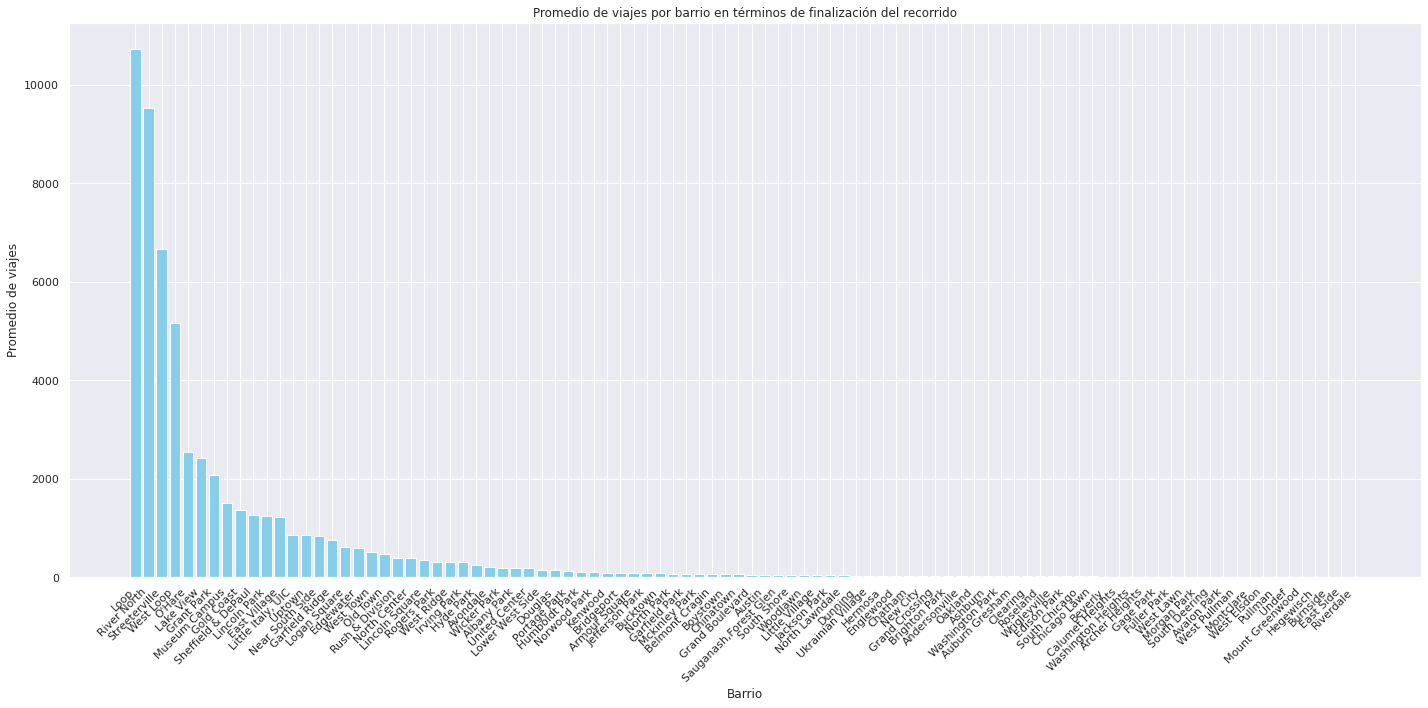

In [66]:
# Ordenamos el DataFrame `locations` por el promedio de viajes en orden descendente
locations_sorted = locations.sort_values(by='average_trips', ascending=False)

# Creamos un gráfico de barras para visualizar todos los barrios y sus promedios de viajes
plt.figure(figsize=(20, 10))
plt.bar(locations_sorted['dropoff_location_name'], locations_sorted['average_trips'], color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.title('Promedio de viajes por barrio en términos de finalización del recorrido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

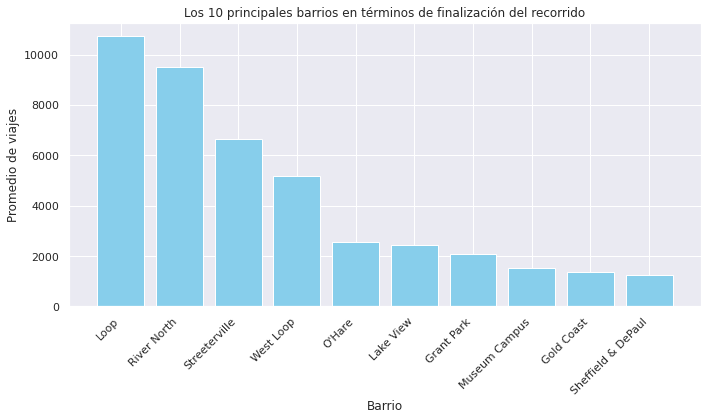

In [67]:
# Ordenar el DataFrame `locations` por el promedio de viajes en orden descendente y seleccionar los primeros 10 barrios
top_10_locations = locations.sort_values(by='average_trips', ascending=False).head(10)

# Crear un gráfico de barras para visualizar los 10 principales barrios y sus promedios de viajes
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['dropoff_location_name'], top_10_locations['average_trips'], color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.title('Los 10 principales barrios en términos de finalización del recorrido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:

# Mostramos la tabla de los 10 principales barrios y sus promedios de viajes
print("Los 10 principales barrios en términos de finalización del recorrido:")
top_10_locations

Los 10 principales barrios en términos de finalización del recorrido:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Por último vamos a calcular cuanto representan los viajes de los 10 principales barrios con respecto al total de los viajes de todos los barrios.

In [69]:
# Calculamos el total de viajes de todos los barrios
total_trips = locations['average_trips'].sum()

# Seleccionamos los 10 principales barrios y sumar sus viajes
top_10_trips = locations_sorted.head(10)['average_trips'].sum()

# Calculamos el porcentaje
percentage_top_10 = (top_10_trips / total_trips) * 100

print(f"El porcentaje de viajes de los 10 principales barrios es: {percentage_top_10:.2f}%")

El porcentaje de viajes de los 10 principales barrios es: 76.69%


Ahora vamos a analizar el Dataframe de las empresas de taxis.  Para ello también vamos a identificar las 10 principales empresas de taxis en términos del número de viajes de cada una los días 15 y 16 de de noviembre de 2017. Para lo cual primero vamos a realizar un gráfico de todos las empresas y su número de viajes, con el objeto de primero tener una visión completa del conjunto de datos. Para luego realizar un gráfico sólo con las 10 principales empresas de taxis, las cuales también finalmente las vamos a mostrar en una tabla.

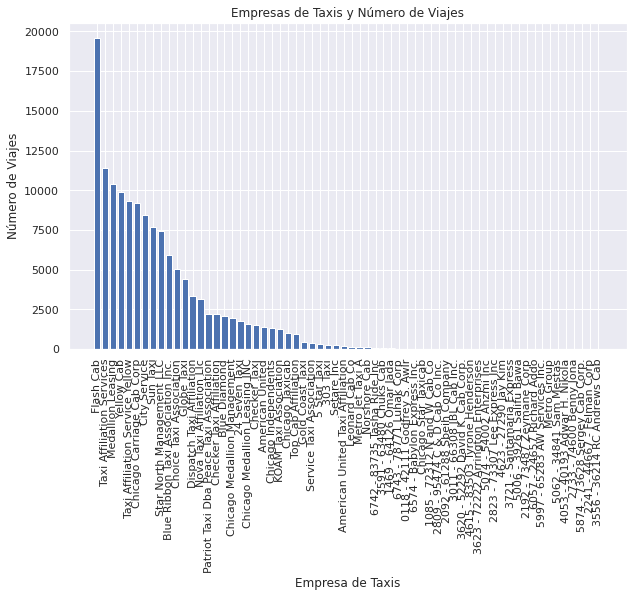

In [70]:
# Gráfico de todas las empresas de taxis y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(companies['company_name'], companies['trips_amount'])
plt.title('Empresas de Taxis y Número de Viajes')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

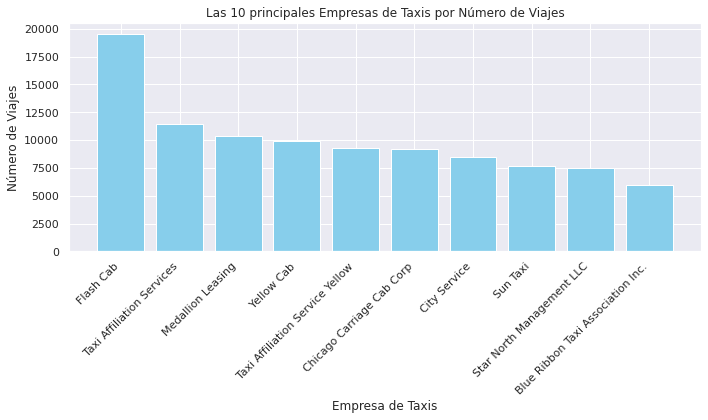

In [71]:
# Ordenamos el DataFrame 'companies' por número de viajes en orden descendente y tomar las 10 primeras empresas.
top_10_companies = companies.nlargest(10, 'trips_amount')

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='skyblue')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Las 10 principales Empresas de Taxis por Número de Viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
# Mostramos la tabla de las 10 principales empresas de taxis por números de viaje:
print("Las 10 principales empresas de taxis por números de viaje:")
top_10_companies

Las 10 principales empresas de taxis por números de viaje:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Por último también vamos a calcular cuanto representan los viajes de las 10 principales empresas con respecto 
al total de los viajes de todos las empresas de taxis.

In [73]:
# Calculamos el número total de viajes de las 10 principales empresas
total_trips_top_10 = top_10_companies['trips_amount'].sum()

# Calculamos el número total de viajes en todas las empresas
total_trips_all_companies = companies['trips_amount'].sum()

# Calculamos el porcentaje
percentage = (total_trips_top_10 / total_trips_all_companies) * 100

print(f'El porcentaje de viajes de las 10 principales empresas es: {percentage:.2f}%')

El porcentaje de viajes de las 10 principales empresas es: 72.30%


Conclusiones Paso 3: 

Con respecto al conjunto de datos con información sobre los barrios de Chicago donde finalizaron los viajes, vemos que los 3 principales barrios son los barrios son Loop, River North y Streeterville. Además hemos analizado que los viajes de los 10 principales barrios superan el 76% del total de los viajes. Además vemos que a partir del gráfico de todos los barrios, existen muchos barrios que tienen muy pocos viajes.

Con respecto al conjunto de datos con información de las compañías de taxis, vemos que las 3 principales compañías son Flash Cab, Taxi Affiliation Services y Medallion Leasin. Además hemos analizado que los viajes de las 10 principales compañías representan más del 72% del total de los viajes. Además vemos que a partir del gráfico de todas las compañías, existen muchas compañías de taxis que no tienen o tienen muy pocos viajes.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente la seccion de graficos. </div>



### Prueba de hipótesis.

Para realizar la Prueba de Hipótesis, primero leemos el Conjunto de Datos con la información de los viajes (travels), el cual contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Sus columnas son start_ts: fecha y hora de la recogida, weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje y duration_seconds: duración del viaje en segundos.

In [40]:
# Cargamos el DataFrame:
#travels = pd.read_csv('/datasets/project_sql_result_07.csv') #cargamos el DataFrame de los sobre viajes 
                                                            # desde el Loop hasta el Aeropuerto Internacional O'Hare. 

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Carga este dataset en la celda correspondiente (La del inicio). Esto es considerado una  buena practica ya que siempre queremos tener al principio todo cargado por si hay que hacer una modificacion en el futuro.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, Fue realizado el cambio para ocupar una celda exclusiva para la carga de los 3 datasets.
</div>

Mostramos información general sobre el Conjunto de Datos:

In [74]:
# Imprimimos la información general/resumida sobre el DataFrame de los viajes.
travels.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(travels.head(10)) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
----------
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good    

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda utilizar el metodo describe() para una exploracion rapida inicial de aquellas variables numéricas. Siempre es necesario realizarlo ya que de forma rápida tenemos un panorama muy bueno de que nos espera e incluso encontraremos inconsistencias si estas existiencen.
Describí al respecto lo que ves. </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, vamos utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas de los 3 datasets.
</div>

In [75]:
# Vamos a utilizar el método describe() para realizar una exploración rápida inicial de las variables numéricas
# del conjunto de datos.
print(travels.describe())

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


En base al método describe podemos ver que en el conjunto de datos viajes desde el Loop hasta el Aeropuerto Internacional O'Hare tenemos un total de 1.068 valores, el valor promedio de la duración de los viajes en segundos es de 2071,73, la desviación estándar es de 769,46 segundos, el valor mínimo de los viajes es de 0 segundos y el valor máximo es de 7440 segundos.

Antes de continuar con la Prueba de Hipótesis, vamos a revisar los tipos de datos que tenemos en cada columna del DataFrame, si tenemos filas totalmente duplicada o si tenemos valores ausentes.

In [76]:
# Verificar los tipos de datos del DataFrame travels
print("Tipos de datos en el DataFrame companies:")
print(travels.dtypes)

Tipos de datos en el DataFrame companies:
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


Al revisar los tipos de datos, vemos que tenemos la columna "start_ts" definida como tipo Object. Antes de continuar la vamos a convertir a una columna tipo fecha:

In [77]:
# Convertimos la columna "start_ts" a tipo datetime
travels['start_ts'] = pd.to_datetime(travels['start_ts'])
# Luego para verificar el cambio volvemos a imprimir los tipos de datos del DataFrame travels
print("Tipos de datos en el DataFrame companies:")
print(travels.dtypes)

Tipos de datos en el DataFrame companies:
start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


Confirmamos que hemos cambio a tipo fecha la columna 'start_ts'.

In [78]:
# Verificamos si hay filas totalmente duplicadas en el Dataframe.
print('El número de filas totalmente duplicadas en el DF travels es:')
print(travels.duplicated().sum()) # verificamos si hay filas duplicadas.
print('------------------')

El número de filas totalmente duplicadas en el DF travels es:
197
------------------


In [79]:
#Verificamos si hay valores ausentes en alguno de el dataframe:
print(travels.isna().sum()) # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Comprobamos que no tenemos valores ausentes, pero si tenemos filas totalmente duplicadas. Por lo que procederemos a eliminar estas filas totalmente duplicadas.

In [81]:
# A modo de información, primero vamos a imprimir las filas duplicadas.
duplicate_rows = travels[travels.duplicated()]
print("Filas totalmente duplicadas en el DataFrame 'travels':")
print(duplicate_rows)

Filas totalmente duplicadas en el DataFrame 'travels':
                start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


In [82]:
# Eliminamos las filas totalmente duplicadas
travels = travels.drop_duplicates().reset_index(drop=True) # se eliminan los duplicados explícitos
# Ahora también reiniciamos el índice y eliminamos el antiguo con ayuda del método reset_index.

In [83]:
# Luego verificamos que ya no hay filas totalmente duplicadas en el Dataframe.
print('El número de filas totalmente duplicadas en el DF travels es:')
print(travels.duplicated().sum()) # verificamos si hay filas duplicadas.
print('------------------')

El número de filas totalmente duplicadas en el DF travels es:
0
------------------


Ahora que ya hemos preparado los datos del DataFrame travels, debemos probar la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Con el objeto de analizar previamente los datos, antes de la prueba de hipótesis vamos a graficar como es la distribución de la duración de los viajes en función de las condiciones del tiempo.

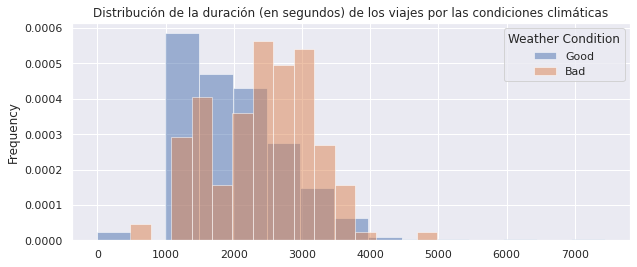

In [84]:

plt.figure(figsize=(10, 4))
travels.query("weather_conditions=='Good'")["duration_seconds"].hist(
label="Good",
ax=plt.gca(),
density=True,
alpha=0.5,
bins=15
)
travels.query("weather_conditions=='Bad'")["duration_seconds"].plot(
kind="hist",
label="Bad",
ax=plt.gca(),
density=True,
alpha=0.5, 
bins=15
)
plt. legend(title="Weather Condition")
plt.title("Distribución de la duración (en segundos) de los viajes por las condiciones climáticas")
plt. show()

Del gráfico podemos ver que la duración de los viajes es ligeramente superior cuando las condiciones climáticas son malas.

Para poder realizar la prueba de hipótesis necesitamos establecer el valor de umbral alfa, que corresponde al nivel de significancia que utilizamos para evaluar la evidencia en contra de la hipótesis nula. Es el nivel de probabilidad que estamos dispuestos a aceptar como evidencia suficiente para rechazar la hipótesis nula. Vamos a considerar un valor comúnmente utilizado para α de 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I, es decir, rechazar incorrectamente la hipótesis nula cuando es verdadera.

Para esta prueba de hipótesis, vamos a definir las siguientes Hipótesis nula e Hipótesis alternativa:

Hipótesis Nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos es igual a la duración promedio de los viajes en sábados no lluviosos.

Hipótesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos es diferente de la duración promedio de los viajes en sábados no lluviosos.

Para probar estas hipótesis, utilizaremos un test de hipótesis de comparación de medias (prueba t de Student para muestras independientes). Este test compara las medias de dos grupos para determinar si existe una diferencia significativa entre ellas. 

El criterio utilizado para probar las hipótesis es el valor p (p-value). Este valor representa la probabilidad de observar una diferencia igual o más extrema entre las medias de los dos grupos si la hipótesis nula fuera cierta. Si el valor p es menor que el nivel de significancia (alfa), que establecimos en 0.05, se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para afirmar que existe una diferencia significativa entre las duraciones promedio de los viajes en sábados lluviosos y no lluviosos.

En resumen, la prueba t nos permite determinar si la diferencia en la duración promedio de los viajes entre los sábados lluviosos y no lluviosos es estadísticamente significativa, lo que nos ayuda a validar o refutar la hipótesis planteada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto manejo de la data, los graficos y la descripcion de la prueba .</div>

In [85]:
# Filtramos los viajes que ocurrieron los sábados y que además fueron lluviosos
saturdays_rainy = travels[(travels['start_ts'].dt.dayofweek == 5) & (travels['weather_conditions'] == 'Bad')]

# Filtramos los viajes que ocurrieron los sábados, pero que no fueron lluviosos
saturdays_not_rainy = travels[(travels['start_ts'].dt.dayofweek == 5) & (travels['weather_conditions'] != 'Bad')]

# Calculamos la duración promedio de los viajes para los sábados lluviosos y sábados no lluviosos
duracion_promedio_sabado_lluvioso = saturdays_rainy['duration_seconds'].mean()
duracion_promedio_sabado_no_lluvioso = saturdays_not_rainy['duration_seconds'].mean()

# Realizamos el test de hipótesis
test_result = st.ttest_ind(saturdays_rainy['duration_seconds'], saturdays_not_rainy['duration_seconds'], equal_var = False)

# Nivel de significancia (alfa)
alfa = 0.05

# Imprimimos los resultados
print("Duración promedio de viajes los sábados lluviosos:", duracion_promedio_sabado_lluvioso)
print("Duración promedio de viajes en sábados no lluviosos:", duracion_promedio_sabado_no_lluvioso)
print("Valor p del test de hipótesis:", test_result.pvalue)

# Comparamos el valor p con el nivel de significancia alfa
if test_result.pvalue < alfa:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No podemos afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.")

Duración promedio de viajes los sábados lluviosos: 2409.2297297297296
Duración promedio de viajes en sábados no lluviosos: 2032.253112033195
Valor p del test de hipótesis: 9.126383933880083e-08
Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El parametro equal_var es muy importante para este tipo de pruebas ya que le estamos indicando si las varianzas para cada conjunto son diferentes (False). Si fueran iguales (True), puede que el resultado cambie, ya que se calcula de forma diferente. Mas que nada cuando la distribucion de las muestras son desiguales (como en este caso).
Por esto es importante, cuando realizamos esta prueba (t student). Confirmar si las varianzas son iguales o no para ambos conjuntos. Para esto se realizan **pruebas estadisticas** (como **levene**) para identificar si son iguales o no las varianzas.

Al realizarla ajusta el parametro si fuera necesario .</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, excelente.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

ok, vamos a realizar la prueba de hipótesis pero ahora confirmando si las varianzas son iguales o no para ambos conjuntos. Para esto utilizaremos la prueba estadistica levene. 
Vamos a configurar el parámetro equal_var basado en el resultado de la prueba de Levene. Si el valor p obtenido de la prueba de Levene es menor que 0.05, indica que hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas, entonces establecemos equal_var en False, lo que significa que asumimos que las varianzas son diferentes. 
Por otro lado, si el valor p es mayor o igual a 0.05, establecemos equal_var en True, lo que indica que no tenemos evidencia suficiente para rechazar la hipótesis nula y asumimos que las varianzas son iguales.

</div>

In [90]:
# Filtramos los viajes que ocurrieron los sábados y que además fueron lluviosos
saturdays_rainy = travels[(travels['start_ts'].dt.dayofweek == 5) & (travels['weather_conditions'] == 'Bad')]

# Filtramos los viajes que ocurrieron los sábados, pero que no fueron lluviosos
saturdays_not_rainy = travels[(travels['start_ts'].dt.dayofweek == 5) & (travels['weather_conditions'] != 'Bad')]

# Realizamos la prueba de Levene para evaluar la igualdad de varianzas
levene_test = st.levene(saturdays_rainy['duration_seconds'], saturdays_not_rainy['duration_seconds'])
print("Resultado de la prueba de Levene:",levene_test.pvalue)

# Configuramos el parámetro equal_var en función del resultado de la prueba de Levene
equal_var = not (levene_test.pvalue < 0.05)
print("equal_var:",equal_var)

# Realizamos el test de hipótesis
test_result = st.ttest_ind(saturdays_rainy['duration_seconds'], saturdays_not_rainy['duration_seconds'], equal_var=equal_var)

# Nivel de significancia (alfa)
alfa = 0.05

# Imprimimos los resultados
print("Duración promedio de viajes los sábados lluviosos:", saturdays_rainy['duration_seconds'].mean())
print("Duración promedio de viajes en sábados no lluviosos:", saturdays_not_rainy['duration_seconds'].mean())
print("Valor p del test de hipótesis:", test_result.pvalue)

# Comparamos el valor p con el nivel de significancia alfa
if test_result.pvalue < alfa:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No podemos afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.")

Resultado de la prueba de Levene: 0.9806770360671218
equal_var: True
Duración promedio de viajes los sábados lluviosos: 2409.2297297297296
Duración promedio de viajes en sábados no lluviosos: 2032.253112033195
Valor p del test de hipótesis: 7.397770692813604e-08
Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la duración promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Simplemente a modo de consejo, cuando realizamos este tipo de prueba, los outliers pueden modificarla. Por lo que generalmente se recomienda tratarlos antes  de realizar la prueba.
</div>

Aplicamos la prueba de hipótesis y rechazamos la hipótesis nula.

### Conclusión general.

Como conclusión general podemos indicar que hemos analizado los tres DataFrame proporcionados, para los cuales 
hemos  realizado las actividades de carga de datos, preparación de los datos, análisis de los datos y prueba de 
hipótesis solcitada.

De los análisis realizados podemos indicar que existen algunos barrios que concentran el número de viajes en taxi,
lo cual debe ser asociado a barrios en los cuales vivan más personas, barrios que tengan una mayor actividad 
comercial o de alguna otra índole. Seguramente los barrios con menos viajes en taxi como destino final, pueden ser
barrios menos poblados o que se encuentren en la periferia de la ciudad.

Con respecto a las compañias de taxi, vemos que existen algunas compañías que concentran el número de viajes. 
Esto se puede deber a distintos motivos, desde tarifas de los viajes, cantidad de móviles disponibles y sectores
de cobertura de cada compañía.

Con respecto a la hipótesis solitada, en base a la información proporcionada, pudimos comprobar que la duración
promedio de los viajes difiere entre los sábados lluviosos y los sábados no lluviosos, resultado que coincide 
con el gráfico que generamos de la distribución de los viajes en base a las condiciones del tiempo.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena conclusion general.</div>